In [22]:
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess, minimize_scalar

itercounter = 7
Xmin = [ 1.  1.] fmin = 0.0
funccounter = 87 itercounter = 0


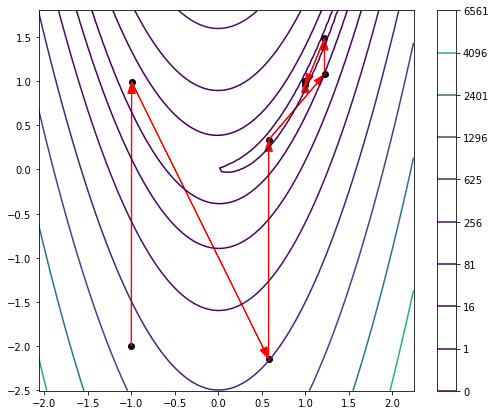

In [1]:
run MetOpt.py

In [18]:
import numpy as np

In [213]:
eps = 1e-3
func_count = 0
def f1(x):
    global func_count
    func_count += 1
    return((x - 5) ** 2 + 1)

In [215]:
def golden_section(func, bracket):
    k = (np.sqrt(5)-1)/2
    a, b = bracket
    l = b - a
    l = k * l
    x = b - l
    y = a + l
    fx, fy = func(x), func(y)
    iter_count = 0
    while True:
        l = k * l
        if fx >= fy:
            a = x
            x = y
            y = a + l
        else:
            b = y
            y = x
            x = b - l
        fx, fy = (func(x), func(y))
        if l < eps:        
            fmin = np.min((fx, fy))
            xmin = np.argmin((fx, fy))
            if xmin:
                xmin = y
            else:
                xmin = x
            break
        iter_count += 1
    return(xmin, fmin, iter_count)

In [216]:
xmin, fmin, iter_count = golden_section(f1, [0,10])

In [217]:
xmin, fmin, iter_count, func_count

(5.0002042817450434, 1.0000000417310313, 18, 42)